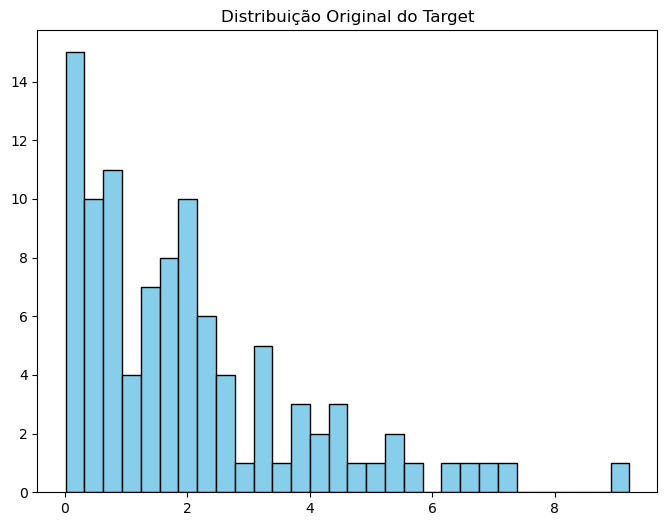

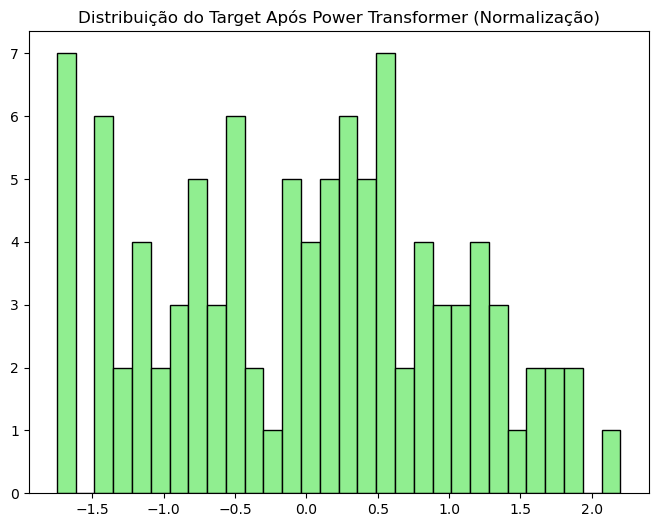

MSE com Power Transformer (dados normalizados): 1.2452186301372177


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Gerando um exemplo de dados com distribuição assimétrica para a variável target
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 amostras, 2 features
y = np.random.exponential(scale=2, size=100)  # target com distribuição exponencial

# Visualizando a distribuição original da variável target
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição Original do Target')
plt.show()

# Power Transformer para normalizar os dados
power_transformer = PowerTransformer(method='yeo-johnson')
y_power_transformed = power_transformer.fit_transform(y.reshape(-1, 1)).flatten()

# Visualizando a distribuição após o Power Transformer
plt.figure(figsize=(8, 6))
plt.hist(y_power_transformed, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribuição do Target Após Power Transformer (Normalização)')
plt.show()

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_power_transformed, test_size=0.3, random_state=42)

# Modelo de Regressão Linear para comparação de performance
model = LinearRegression()

# Treinando o modelo com dados originais (sem transformação)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_power = mean_squared_error(y_test, y_pred)
print(f'MSE com Power Transformer (dados normalizados): {mse_power}')

# Explicação do que está sendo feito:
# Agora, tanto o target (y) quanto as features (X) são ajustados com o Power Transformer. 
# Isso garante que as amostras de treino e teste tenham o mesmo número de exemplos.
# O erro quadrático médio (MSE) será usado para comparar o desempenho do modelo treinado com os dados normalizados.
